<a href="https://colab.research.google.com/github/ozlemizgi/data_heartmedical/blob/main/6_haftaheartdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Kütüphanelerin Çağırılması
import numpy as np
import pandas as pd

from sklearn import preprocessing

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Veriyi okumadan önce Sütun isimlerini içerisinde barındıran bir liste oluşturduk, kendi istediğimiz gibi isimlendirdik.
features = ["id" , "age" , "gender", "impluse" , "pressurehight" , "pressurelow" , "glucose" , "kcm" , "troponin" , "class"]

# Veriyi okurken names= features diyerek kendi veridiğimiz isimlere göre okuması için komut verdik.
heart = pd.read_csv("https://raw.githubusercontent.com/ozlemizgi/data_heartmedical/main/csv_result-Medicaldataset.csv", names= features, header=0)
heart.sample(11)

,id,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
1121,1122,63,1,82,164,90,95.0,2.600,0.507,positive
11,12,63,0,60,150,83,198.0,2.390,0.013,negative
573,574,68,1,90,111,65,134.0,1.650,0.016,positive
884,885,60,0,65,129,75,132.0,28.410,0.054,positive
663,664,81,0,64,112,65,97.0,4.960,0.007,positive
980,981,65,1,62,76,55,113.0,1.670,0.023,positive
518,519,63,1,103,126,75,92.0,14.010,0.196,positive
299,300,65,1,72,100,57,93.0,3.460,0.106,positive
939,940,53,1,73,131,68,100.0,0.785,0.609,positive
757,758,39,0,75,116,71,120.0,1.590,0.003,negative


In [4]:
# Veri setinin boyutları
print("Satır:", heart.shape[0], '\t', "Sütun:", heart.shape[1])

# bir Satır boşluk bırak
print("-"*80)

# Veri setinin sütun isimleri
print(heart.columns)

Satır: 1319 	 Sütun: 10
--------------------------------------------------------------------------------
Index(['id', 'age', 'gender', 'impluse', 'pressurehight', 'pressurelow',
       'glucose', 'kcm', 'troponin', 'class'],
      dtype='object')


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1319 non-null   int64  
 1   age            1319 non-null   int64  
 2   gender         1319 non-null   int64  
 3   impluse        1319 non-null   int64  
 4   pressurehight  1319 non-null   int64  
 5   pressurelow    1319 non-null   int64  
 6   glucose        1319 non-null   float64
 7   kcm            1319 non-null   float64
 8   troponin       1319 non-null   float64
 9   class          1319 non-null   object 
dtypes: float64(3), int64(6), object(1)
memory usage: 103.2+ KB


In [11]:
heart["class"].value_counts()

positive    810
negative    509
Name: class, dtype: int64

In [12]:
# Veriyi istatistiksel açıdan inceleyelim.
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1319.0,660.000000,380.906813,1.000,330.500,660.000,989.5000,1319.0
age,1319.0,56.191812,13.647315,14.000,47.000,58.000,65.0000,103.0
gender,1319.0,0.659591,0.474027,0.000,0.000,1.000,1.0000,1.0
impluse,1319.0,78.336619,51.630270,20.000,64.000,74.000,85.0000,1111.0
pressurehight,1319.0,127.170584,26.122720,42.000,110.000,124.000,143.0000,223.0
pressurelow,1319.0,72.269143,14.033924,38.000,62.000,72.000,81.0000,154.0
glucose,1319.0,146.634344,74.923045,35.000,98.000,116.000,169.5000,541.0
kcm,1319.0,15.274306,46.327083,0.321,1.655,2.850,5.8050,300.0
troponin,1319.0,0.360942,1.154568,0.001,0.006,0.014,0.0855,10.3


In [13]:
heart.sample(6)

,id,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
586,587,60,1,98,144,66,98.0,1.54,0.025,positive
191,192,58,1,73,160,95,91.0,1.98,0.051,positive
352,353,63,1,113,131,63,66.0,6.13,0.013,negative
840,841,30,1,112,115,69,109.0,1.52,0.011,negative
494,495,37,1,59,125,72,122.0,0.78,0.003,negative
408,409,80,0,89,85,40,97.0,18.41,0.010,positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


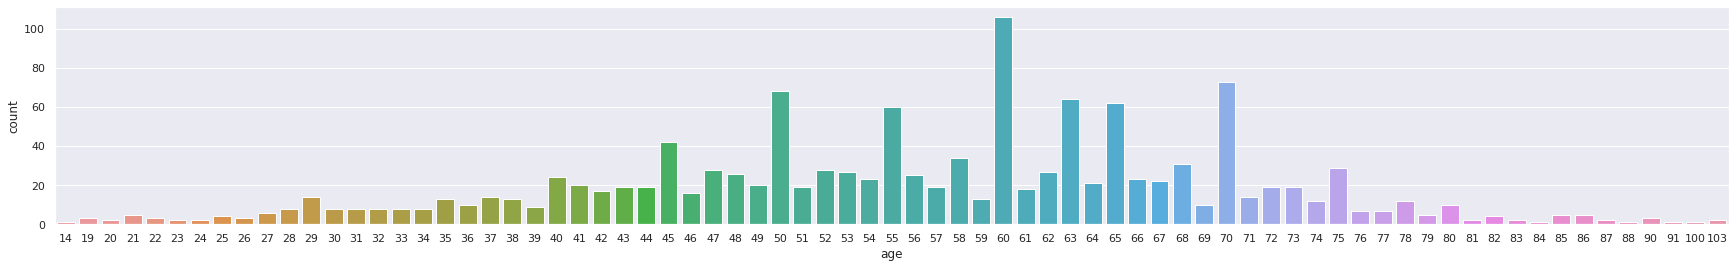

In [28]:
plt.subplots(figsize=(30,4))
sns.countplot(heart["age"])

In [35]:
heart['age_groupped'] = pd.cut(heart['age'],
                                 bins = [0,18,30,55,70,103])
heart.sample(8)

,id,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class,age_grups,age_groupped
205,206,52,1,62,180,100,233.0,2.94,3.390,positive,"(30, 55]","(30, 55]"
862,863,44,1,74,145,85,115.0,2.11,0.193,positive,"(30, 55]","(30, 55]"
1095,1096,50,0,85,119,76,130.0,16.10,0.009,positive,"(30, 55]","(30, 55]"
1207,1208,50,0,82,108,61,77.0,1.19,0.916,positive,"(30, 55]","(30, 55]"
1258,1259,33,1,62,76,55,106.0,0.71,0.007,negative,"(30, 55]","(30, 55]"
1172,1173,30,1,72,100,57,89.0,19.26,0.026,positive,"(18, 30]","(18, 30]"
826,827,47,0,67,113,82,143.0,3.30,0.003,negative,"(30, 55]","(30, 55]"
784,785,41,1,87,135,84,80.0,42.15,0.030,positive,"(30, 55]","(30, 55]"


In [40]:
heart['age_groupped']=pd.cut(heart['age'], 
                            bins=[0,18,30,55,70,103],
                            labels = ["çocuk", "genç", "orta yaş","yaşlı","çok yaşlı"])
heart.sample(10)

,id,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class,age_grups,age_groupped
1315,1316,66,1,84,125,55,149.0,1.330,0.172,positive,"(55, 70]",yaşlı
379,380,45,1,77,88,60,202.0,0.583,0.003,negative,"(30, 55]",orta yaş
1025,1026,40,1,95,101,76,167.0,3.570,0.029,positive,"(30, 55]",orta yaş
712,713,56,1,76,150,81,262.0,3.950,0.050,positive,"(55, 70]",yaşlı
205,206,52,1,62,180,100,233.0,2.940,3.390,positive,"(30, 55]",orta yaş
150,151,45,0,86,70,92,90.0,4.760,0.003,negative,"(30, 55]",orta yaş
734,735,45,1,61,124,62,391.0,1.700,0.006,negative,"(30, 55]",orta yaş
1143,1144,74,1,87,135,84,99.0,1.170,0.043,positive,"(70, 103]",çok yaşlı
118,119,60,1,71,112,68,66.0,6.280,0.094,positive,"(55, 70]",yaşlı
523,524,63,1,102,124,71,123.0,8.370,0.018,positive,"(55, 70]",yaşlı
